**ALGORITMO GENÉTICO**       

La **función a minimizar** es: f = (x1^2 + x2 -11)^2 + (x1 + x2^2 -7)^2;

**Rango de valores:** 0<=x1,x2<=6;
**Número de individuos iniciales:** 20;
**Resolución =** 0.006;


In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xu = 6;             #Límite inferior
xl = 0;             #Límite superior
res = 0.006;        #Resolución
tamanoPobla = 20;   #Tamaño de la Población

In [3]:
# Calcular el número de bits (q) a utilizar para representar cada variable, con una resolución de 0.006 en el intervalo (0,6):

q = np.ceil(np.log2(((xu - xl)/(res))+1))


In [4]:
def randPopulationPlantilla(xu,xl,tamanoPobla,q):
  #binPop: población de números binarios
  #decodedV: números binarios en decimal
  #r: valores en decimal de las variables x1 y x2;

  decodedV = np.random.randint(0,(2**q)-1, size=(tamanoPobla,1)) #Se crea una matriz de valores enteros aleatorios entre 0 y (2^q)-1

  binPop = np.zeros((tamanoPobla,int(q)))
  cont = 0

  #Ciclo para crear matriz de valores binarios
  for i in range(decodedV.shape[0]): 
    binValue = format(decodedV[i,0], '#012b').replace("0b", "")
    temp = list(map(int, [*binValue]))
    binPop[cont,:] = temp
    cont+=1

  #Valores en decimal de las variables x1 y x2
  r = ((xu-xl)/((2**q)-1))*decodedV


  return(binPop,decodedV,r)



In [5]:
#Inicialización de la Población de Individuos
binPopx1,decodedVx1,rx1 = randPopulationPlantilla(xu,xl,tamanoPobla,q)
binPopx2,decodedVx2,rx2 = randPopulationPlantilla(xu,xl,tamanoPobla,q)

In [6]:
#Cálculo de la Función Fitness
def Fitness(rx1,rx2):
  
  #Completar
  f = (rx1**2 + rx2 -11)**2 + (rx1 + rx2**2 -7)**2
  Fit = 1/(f+1)

  return (Fit,f)


In [7]:
#Cálculo de la Reproducción
#Completar:
Fit,f = Fitness(rx1,rx2)
dataSize = Fit.shape
m = dataSize[0]
P = np.zeros((20,1))
PA = np.zeros((20,1))
RP = np.zeros((20,2))
RP1 = np.zeros((20,1))
MR = np.zeros((20,int(q+q)))

#Probabilidades:
for i in range(m):
  P[i] = Fit[i]/np.sum(Fit)
  
  #Probabilidad Acumulada
  PA[i] = PA[i-1] + P[i]

  #Rango Probabilidades
  if(i != 19):
    RP1[i+1] = PA[i]
  
  RP[i,0] = RP1[i]
  RP[i,1] = PA[i]

#Metodo Ruleta
for i in range(m):
  K = np.random.rand(1,1)
  for j in range(m):
    if(K >= RP[j,0] and K<RP[j,1]):
      break
  MR[i,:] = np.concatenate((binPopx1[j,:],binPopx2[j,:]))


In [8]:
#Cálculo de la Reproducción
def Reproduccion(Fit,binPopx1,binPopx2):
  
  #Completar:
  Fit,f = Fitness(rx1,rx2)
  dataSize = Fit.shape
  m = dataSize[0]
  P = np.zeros((20,1))
  PA = np.zeros((20,1))
  RP = np.zeros((20,2))
  RP1 = np.zeros((20,1))
  MR = np.zeros((20,int(q+q)))

  #Probabilidades:
  for i in range(m):
    P[i] = Fit[i]/np.sum(Fit)

    #Probabilidad Acumulada
    PA[i] = PA[i-1] + P[i]

    #Rango Probabilidades
    if(i != 19):
      RP1[i+1] = PA[i]

      RP[i,0] = RP1[i]
      RP[i,1] = PA[i]

  #Metodo Ruleta
  for i in range(m):
    K = np.random.rand(1,1)
    for j in range(m):
      if(K >= RP[j,0] and K<RP[j,1]):
        break
    MR[i,:] = np.concatenate((binPopx1[j,:],binPopx2[j,:]))
  
  return (MR)

In [9]:
#Cálculo de Crossover
def Crossover(MR):
  
  #Completar:

  MC = MR

  NumFilas = MC.shape[0] # Obtener el numero de filas de la matriz
  NumColumnas = MC.shape[1] # Obtener el numero de columnas de la matriz

  NumFilas60 = int(0.6 * NumFilas) # Calcular el 60% del numero de filas


  for i in range(0, NumFilas60, 2):
      K = np.random.randint(0,NumColumnas)

      Padre1 = MR[i,:]
      Padre2 = MR[i+1,:]

      Hijo1 = np.concatenate((Padre1[0:K],Padre2[K:]))
      Hijo2 = np.concatenate((Padre2[0:K],Padre1[K:]))
      
      MC[i,:] = Hijo1
      MC[i+1,:] = Hijo2

  return (MC)

In [10]:
#Cálculo de la Mutación
def Mutacion(MC):
  
  #Completar:

  MM = MC
  NumColumnas = MC.shape[1] # Obtener el numero de columnas de la matriz

  for i in range(20):

    K1 = np.random.random()

    if (K1 >= 0.5):
      K2 = np.random.randint(0,NumColumnas)
      auxMM = MM[i,K2]
      if (auxMM == 1):
        MM[i,K2] = 0
      else:
        MM[i,K2] = 1

  return (MM)

In [11]:
#Paso Intermedio

def MM2IntmdVal(MM):
  binPopx1 = MM[:,0:int(q)]
  binPopx2 = MM[:,int(q):]


  for i in range(tamanoPobla):
    binValX1 = binPopx1[i,:].astype(int)
    binValX2 = binPopx2[i,:].astype(int)

    binValX1Str = (np.array_str(binValX1)).replace(' ','')[1:-1]
    binValX2Str = (np.array_str(binValX2)).replace(' ','')[1:-1]

    decodX1 = int(binValX1Str,2)
    decodX2 = int(binValX2Str,2)

    rx1[i,0] = ((xu-xl)/((2**q)-1))*decodX1
    rx2[i,0] = ((xu-xl)/((2**q)-1))*decodX2

  return(binPopx1,binPopx2,rx1,rx2)


El valor de x1 que minimiza la función es:  [3.02639296]
El valor de x2 que minimiza la función es:  [1.98826979]


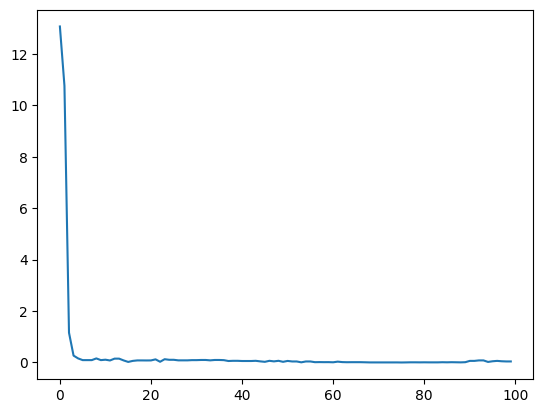

In [12]:
#Definicion Parámetro Iniciales del problema:

xu = 6;             #Límite inferior
xl = 0;             #Límite superior
res = 0.006;        #Resolución
tamanoPobla = 20;   #Tamaño de la Población

NumIteraciones = 100
f_history = np.zeros((NumIteraciones,1))

# Calcule el número de bits (q) a utilizar para representar cada variable, con una resolución de 0.006 en el intervalo (0,6):
q = np.ceil(np.log2(((xu - xl)/(res))+1))


#Inicialización de la Población de Individuos
binPopx1,decodedVx1,rx1 = randPopulationPlantilla(xu,xl,tamanoPobla,q)
binPopx2,decodedVx2,rx2 = randPopulationPlantilla(xu,xl,tamanoPobla,q)

for l in range(NumIteraciones):
  Fit,f = Fitness(rx1,rx2)
  f_history[l,0] = min(f)
  MR = Reproduccion(Fit,binPopx1,binPopx2)
  MC = Crossover(MR)
  MM = Mutacion(MC)
  (binPopx1,binPopx2,rx1,rx2) = MM2IntmdVal(MM)

Fit,f = Fitness(rx1,rx2)
posMin = np.argmin(f)
print("El valor de x1 que minimiza la función es: ", rx1[int(posMin)])
print("El valor de x2 que minimiza la función es: ", rx2[int(posMin)])
plt.plot(f_history)

In [10]:
#Cálculo de Crossover
#Completar:
#MC = np.zeros((20,20))
MC = MR
#Padre1 = np.zeros((1,20))
#Padre2 = np.zeros((1,20))
#Hijo1 = np.zeros((1,20))
#Hijo2 = np.zeros((20,1))

NumFilas = MC.shape[0] # Obtener el numero de filas de la matriz
NumColumnas = MC.shape[1] # Obtener el numero de columnas de la matriz

NumFilas60 = int(0.6 * NumFilas) # Calcular el 60% del numero de filas

for i in range(0, NumFilas60, 2):
    K = np.random.randint(0,NumColumnas)

    Padre1 = MR[i,:]
    Padre2 = MR[i+1,:]

    Hijo1 = np.concatenate((Padre1[0:K],Padre2[K:]))
    Hijo2 = np.concatenate((Padre2[0:K],Padre1[K:]))

    #MC[i,:] = np.concatenate((MR[i,:],Hijo1[i,:]))
    #MC[i+1,:] = np.concatenate((MR[i+1,:],Hijo2))
    MC[i,:] = Hijo1
    MC[i+1,:] = Hijo2

print(MC)

[[1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.

In [12]:
#Cálculo de la Mutación

MM = MC
NumColumnas = MC.shape[1] # Obtener el numero de columnas de la matriz

for i in range(20):

  K1 = np.random.random()
  #print(K1)

  if (K1 >= 0.5):
    K2 = np.random.randint(0,NumColumnas)
    #print(K2)
    auxMM = MM[i,K2]
    if (auxMM == 1):
      MM[i,K2] = 0
    else:
      MM[i,K2] = 1

print(MM)




[[1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.